# 인공신경망 활용하기



## 실습 목표
-----
- torchvision 데이터 셋을 사용하여 이미지 분류기를 생성
- 생성한 모델을 저장하고, 저장된 모델을 다시 불러와서 사용




## 문제 정의
-----
- pytorch를 사용하여 기본적인 인공신경망을 생성하여 이미지 분류기를 생성
- 데이터셋: [Fashion MNIST](https://pytorch.org/vision/0.9/datasets.html#fashion-mnist)

## Fashion MNIST Classifier
----
Fashion MNIST 데이터셋을 사용하여 옷의 품목을 구분하는 분류기를 신경망을 사용하여 구현

### [Step1] Load libraries & Datasets

* **[torch.nn](https://pytorch.org/docs/stable/nn.html)** :  신경망을 생성하기 위한 기본 재료들을 제공(Modules, Sequential, Layer, Activations, Loss, Dropout...)
* **[torchvision.datasets](https://pytorch.org/vision/0.9/datasets.html#fashion-mnist)** : torchvision.transforms를 사용해 변형이 가능한 형태, feature와 label을 반환
* **[torchvision.transforms](https://tutorials.pytorch.kr/beginner/basics/transforms_tutorial.html)**
    * ToTensor() : ndarray를 FloatTensor로 변환하고 이미지 픽셀 크기를 [0., 1.]범위로 조정(scale)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from torch import nn

from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
# FashionMNIST 데이터 불러오기
training_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor(),
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor(),
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 13.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 210kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.42MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.1MB/s]


### [Step2] Create DataLoader

In [3]:
train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = False)

In [4]:
# Device 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'device = {device}')

device = cuda


#### EDA

In [5]:
print(training_data, '\n------------------\n', test_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() 
------------------
 Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [6]:
training_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


label=9


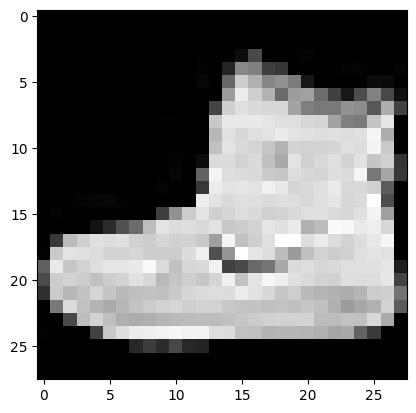

In [8]:
img, label = training_data[0]
plt.imshow(img.squeeze(), cmap='gray')
print(f'label={label}')

In [9]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

Shirt
Shirt
Sandal
Pullover
Sandal
Dress
Shirt
Sneaker
Dress
Dress


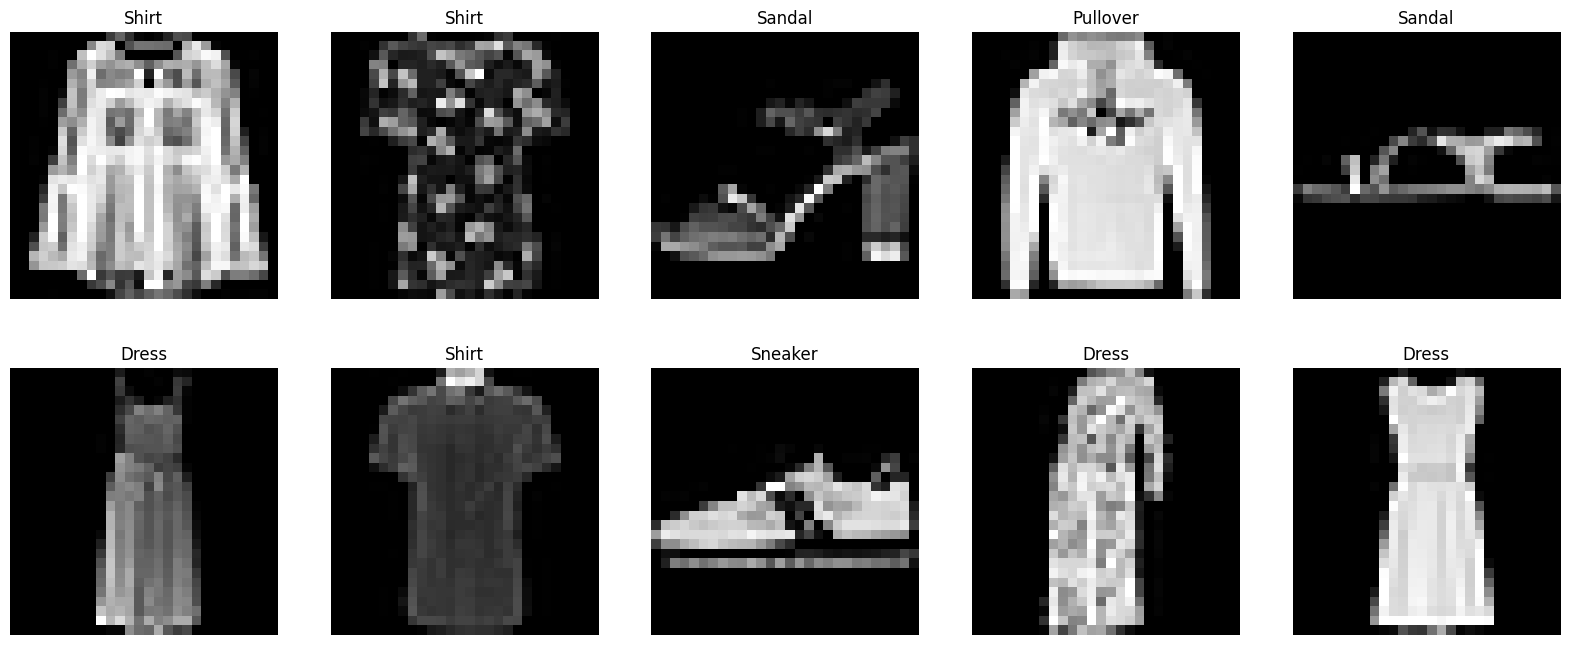

In [10]:
figure = plt.figure(figsize = (20, 8))
cols, rows = 5, 2

for i in range(1, cols * rows +1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    print(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

### [Step3] Set Network Structure

In [11]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.classifier = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        output = self.classifier(x)
        return output

### [Step4] Create Model instance

In [12]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


#### Model 테스트

In [13]:
X = torch.rand(1, 28, 28, device = device)
output = model(X)
print(f'모델 출력 결과: {output}\n')

pred_probab = nn.Softmax(dim=1)(output)
print(f'Softmax 결과: {pred_probab}\n')

y_pred = pred_probab.argmax()
print(y_pred)

모델 출력 결과: tensor([[-0.1022,  0.0564, -0.2333, -0.0420,  0.1036, -0.0130,  0.1425, -0.0817,
         -0.0238,  0.0165]], device='cuda:0', grad_fn=<AddmmBackward0>)

Softmax 결과: tensor([[0.0914, 0.1071, 0.0802, 0.0971, 0.1123, 0.0999, 0.1168, 0.0933, 0.0989,
         0.1029]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

tensor(6, device='cuda:0')


### [Step5] Model compile

In [14]:
# Loss
loss = nn.CrossEntropyLoss()
# Optimizer
learning_rate = 1e-3  #0.001
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

### [Step6] Set train loop

In [15]:
def train_loop(train_loader, model, loss_fn, optimizer):
    size = len(train_loader.dataset)

    for batch, (X, y) in enumerate(train_loader):
        X, y = X.to(device), y.to(device)
        pred = model(X)

        # 손실 계산
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f'loss: {loss:>7f}  [{current:>5d}]/{size:5d}')

### [Step7] Set test loop

In [16]:
def test_loop(test_loader, model, loss_fn):
    size = len(test_loader.dataset)
    num_batches = len(test_loader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:8f}\n")

### [Step8] Run model

In [17]:
epochs = 10

for i in range(epochs) :
    print(f"Epoch {i+1} \n------------------------")
    train_loop(train_dataloader, model, loss, optimizer)
    test_loop(test_dataloader, model, loss)
print("Done!")

Epoch 1 
------------------------
loss: 2.333730  [    0]/60000
loss: 0.918667  [ 6400]/60000
loss: 0.418214  [12800]/60000
loss: 0.686528  [19200]/60000
loss: 0.433164  [25600]/60000
loss: 0.420833  [32000]/60000
loss: 0.356992  [38400]/60000
loss: 0.305192  [44800]/60000
loss: 0.473106  [51200]/60000
loss: 0.427887  [57600]/60000
Test Error: 
 Accuracy: 83.3%, Avg loss: 0.475404

Epoch 2 
------------------------
loss: 0.390300  [    0]/60000
loss: 0.589085  [ 6400]/60000
loss: 0.290288  [12800]/60000
loss: 0.366199  [19200]/60000
loss: 0.441598  [25600]/60000
loss: 0.379360  [32000]/60000
loss: 0.381933  [38400]/60000
loss: 0.313759  [44800]/60000
loss: 0.421126  [51200]/60000
loss: 0.696106  [57600]/60000
Test Error: 
 Accuracy: 84.7%, Avg loss: 0.430320

Epoch 3 
------------------------
loss: 0.316065  [    0]/60000
loss: 0.448437  [ 6400]/60000
loss: 0.426133  [12800]/60000
loss: 0.238363  [19200]/60000
loss: 0.268709  [25600]/60000
loss: 0.323659  [32000]/60000
loss: 0.307462  

### [Step9] Save & load model

#### parameter만 저장하고 불러오기

In [18]:
torch.save(model.state_dict(), 'model_weights.pth')

In [19]:
model2 = NeuralNetwork().to(device)
print(model2)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [20]:
model2.load_state_dict(torch.load('model_weights.pth'))

<All keys matched successfully>

In [21]:
model2.eval()
test_loop(test_dataloader, model2, loss)

Test Error: 
 Accuracy: 87.5%, Avg loss: 0.339254



#### Model 전체를 저장하고 불러오기

In [22]:
torch.save(model, 'model.pth')

In [23]:
model3 = torch.load('/content/model.pth',weights_only=False)

In [24]:
model3.eval()
test_loop(test_dataloader, model3, loss)

Test Error: 
 Accuracy: 87.5%, Avg loss: 0.339254



예측된 클래스: 2 (Pullover)
실제 클래스: 2 (Pullover)


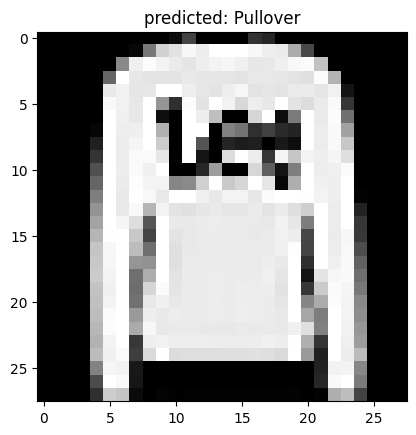

In [29]:
model.eval()

test_img, test_label = test_data[1]
test_img = test_img.unsqueeze(0).to(device)

output = model(test_img)
pred_probab = nn.Softmax(dim=1)(output)
pred_class = pred_probab.argmax(dim=1).item()

print(f"예측된 클래스: {pred_class} ({labels_map[pred_class]})")
print(f"실제 클래스: {test_label} ({labels_map[test_label]})")

plt.imshow(test_img.squeeze().cpu(), cmap='gray')
plt.title(f"predicted: {labels_map[pred_class]}")
plt.show()